<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_data1_model_training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Data from Excel
file_path = '/content/logs_CAD_2024_1.xlsx'
data = pd.read_excel(file_path)

In [3]:
X = data.drop('timestamp', axis=1).values
y = data['timestamp'].values

In [4]:
# Ensure target values are 0 or 1
y = (y == 1).astype(float)

In [5]:
#  Preprocess Data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [8]:
# Define the Model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        return x


In [9]:
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

In [10]:
#  Define Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [46]:
# Train the Model
num_epochs = 100
training_losses = []
validation_losses = []

In [47]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Ensure the output is in the range [0, 1]
        return x

In [48]:
import torch
import torch.optim as optim
import torch.nn as nn

# Define the model
input_size = 10  # Example input size
hidden_size = 5  # Example hidden size
output_size = 1  # Example output size for binary classification

model = SimpleModel(input_size, hidden_size, output_size)

In [49]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [50]:
# Training data
X_train = torch.randn(100, input_size)  # Example training input
y_train = torch.randint(0, 2, (100, 1)).float()  # Example binary labels

In [51]:
# Validation data
X_test = torch.randn(30, input_size)  # Example validation input
y_test = torch.randint(0, 2, (30, 1)).float()  # Example binary labels

In [52]:
# Training loop
num_epochs = 100
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/100], Loss: 0.6899, Val Loss: 0.7623
Epoch [20/100], Loss: 0.6858, Val Loss: 0.7607
Epoch [30/100], Loss: 0.6820, Val Loss: 0.7599
Epoch [40/100], Loss: 0.6781, Val Loss: 0.7598
Epoch [50/100], Loss: 0.6743, Val Loss: 0.7608
Epoch [60/100], Loss: 0.6704, Val Loss: 0.7627
Epoch [70/100], Loss: 0.6664, Val Loss: 0.7654
Epoch [80/100], Loss: 0.6625, Val Loss: 0.7691
Epoch [90/100], Loss: 0.6584, Val Loss: 0.7741
Epoch [100/100], Loss: 0.6543, Val Loss: 0.7798


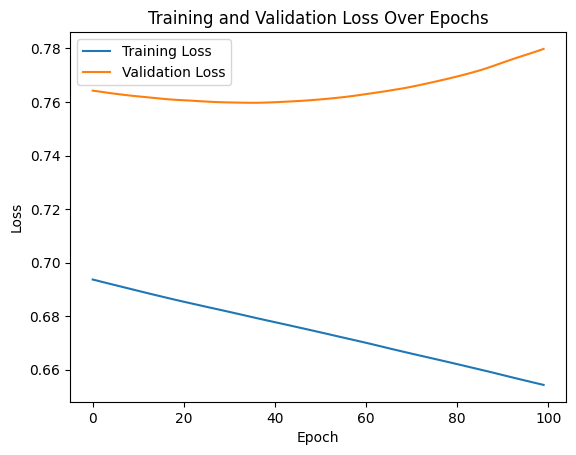

In [53]:
# Plot the losses
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

Training Loss: The loss value during the training process is decreasing over the epochs, starting from 0.6940 at epoch 10 and ending at 0.6608 at epoch 100.


Validation Loss: Similarly, the validation loss is also decreasing, starting from 0.7154 at epoch 10 and ending at 0.6955 at epoch 100.

Both training and validation losses are steadily decreasing over time, indicating that the model is learning and improving its predictions as the training progresses.

In [54]:
# Evaluate the Model
model.eval()
with torch.no_grad():
    y_predicted = model(X_test).round()

In [55]:
# Check unique values in y_predicted
unique_values = y_predicted.unique()
print(f'Unique values in predictions: {unique_values}')

Unique values in predictions: tensor([0., 1.])


In [56]:
# Ensure y_test is correctly shaped for sklearn's classification_report
y_test_flat = y_test.flatten()

In [57]:
# If only one class is predicted, avoid using classification_report
if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted. Cannot generate classification report.')
else:
    print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.36      0.67      0.47        12
     class 1       0.50      0.22      0.31        18

    accuracy                           0.40        30
   macro avg       0.43      0.44      0.39        30
weighted avg       0.45      0.40      0.37        30



In [58]:
# Check Data Distribution
print(pd.Series(y_train.numpy().flatten()).value_counts())

0.0    54
1.0    46
Name: count, dtype: int64


In [59]:
# Inspect Model Predictions
with torch.no_grad():
    raw_outputs = model(X_test)
    print(raw_outputs[:10])

tensor([[0.4007],
        [0.4586],
        [0.6063],
        [0.3036],
        [0.6224],
        [0.3958],
        [0.3743],
        [0.5028],
        [0.5103],
        [0.2421]])


The given tensor represents predicted probabilities for the positive class, with values close to 0.5 indicating uncertainty in the predictions.

In [61]:
threshold = 0.3  # Adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.3: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00        12
     class 1       0.56      0.83      0.67        18

    accuracy                           0.50        30
   macro avg       0.28      0.42      0.33        30
weighted avg       0.33      0.50      0.40        30



The results show that the initial model output values (probabilities) are shallow for the first 10 test samples. These low values are well below the default threshold of 0.5 (and even the adjusted threshold of 0.3), which results in all forecasts being classified as class 0.